In [34]:
import pandas as pd
import pytz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [35]:
# Read in data
data = pd.read_csv('tweets.csv')
data['created'] = pd.to_datetime(data['created']).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
print(data)

                                                  text  \
0    b'RT @TheUndefeated: "Let\'s normalize working...   
1    b'RT @TheUndefeated: "Let\'s normalize working...   
2    b'RT @OnHerTurf: Last night, Holly Rowe highli...   
3    b'RT @OnHerTurf: Last night, Holly Rowe highli...   
4    b'RT @TheUndefeated: "Let\'s normalize working...   
..                                                 ...   
347  b'\xe2\x80\x9cLet\xe2\x80\x99s normalize worki...   
348  b'Arizona coach Adia Barnes pumping at halftim...   
349  b'RT @EMILYveMeAlone: The way Arizona\xe2\x80\...   
350  b'RT @EMILYveMeAlone: The way Arizona\xe2\x80\...   
351  b'The way Arizona\xe2\x80\x99s coach Adia Barn...   

                      created  is_retweet  favorites  retweets  
0   2021-04-05 11:16:33-07:00        True          0       294  
1   2021-04-05 11:13:39-07:00        True          0       294  
2   2021-04-05 11:13:09-07:00        True          0        25  
3   2021-04-05 11:12:50-07:00        True  

In [43]:
# Generate hourly bins
time = pd.to_datetime('2021-04-04 16:00:00-07:00')
bins = []
while time <= pd.to_datetime('2021-04-05 12:00:00-07:00'):
    bins.append(time)
    time = time + np.timedelta64(1, 'h')
print(len(bins))

21


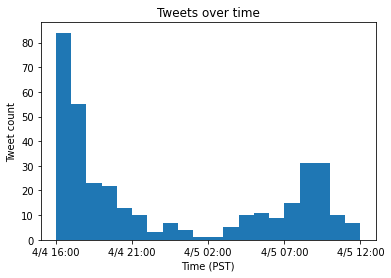

In [48]:
# Plot histogram of Tweets
fig, ax = plt.subplots()
counts,bins, patches = plt.hist(x=data['created'], bins=bins)
plt.title('Tweets over time')
plt.xlabel('Time (PST)')
plt.ylabel('Tweet count')
ax.set_xticks([bins[0], bins[5], bins[10], bins[15], bins[20]])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d %H:%M', tz=pytz.timezone('US/Pacific')))
plt.savefig('tweets_over_time.png')